In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def showit(title = "Image", image = None, size = 16):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-05-21 06:48:57--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.144.14
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.144.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  89.9MB/s    in 0.3s    

2023-05-21 06:48:57 (89.9 MB/s) - ‘images.zip’ saved [29586716/29586716]



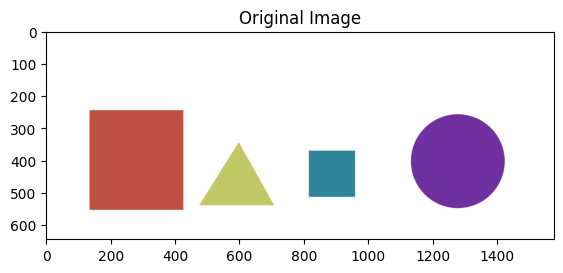

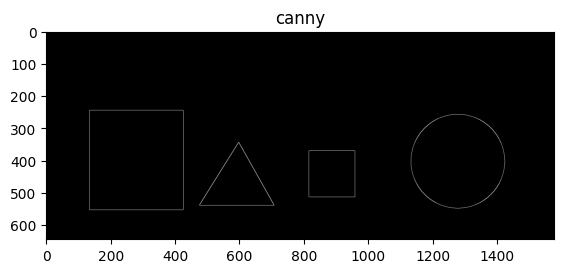

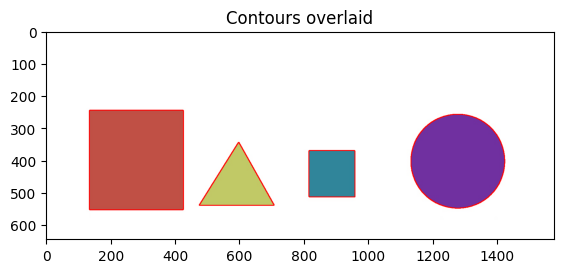

Total Contours: 4


In [ ]:
image=cv2.imread('images/bunchofshapes.jpg')
showit('Original Image',image)
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged=cv2.Canny(gray,50,200)
showit("canny",edged)
contours,hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,contours,-1,(0,0,255),thickness=2)
showit('Contours overlaid',image)
print("Total Contours: "+str(len(contours)))

Contour Areas before sorting: 
[20587.5, 22901.5, 66579.5, 90222.0]
After sorting
[90222.0, 66579.5, 22901.5, 20587.5]


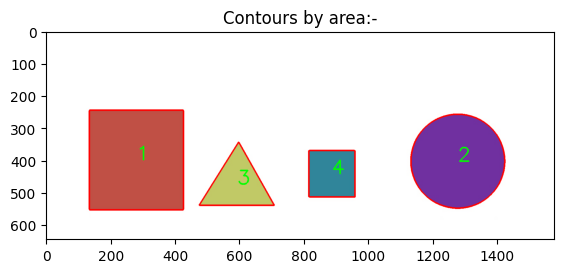

In [ ]:
def get_contour_areas(contours):
  arC=[]
  for c in contours:
    area=cv2.contourArea(c)
    arC.append(area)
  return arC

image=cv2.imread('images/bunchofshapes.jpg')
print('Contour Areas before sorting: ')
print(get_contour_areas(contours))
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print("After sorting")
print(get_contour_areas(sorted_contours))

for i,c in enumerate(sorted_contours):
  M=cv2.moments(c)
  cx=int(M['m10']/M['m00'])
  cy=int(M['m01']/M['m00'])
  cv2.putText(image,str(i+1),(cx,cy),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),4)
  cv2.drawContours(image,[c],-1,(0,0,255),thickness=3)

showit('Contours by area:-',image)

In [ ]:
def x_contour(contour):
  if cv2.contourArea(contour)>15:
    M=cv2.moments(contour)
    return (int(M['m10']/M['m00']))
  else:
    pass

def contour_center(image,contour):
  M=cv2.moments(contour)
  cx=int(M['m10']/M['m00'])
  cy=int(M['m01']/M['m00'])
  cv2.circle(image,(cx,cy),10,(0,0,255),-1)
  return image

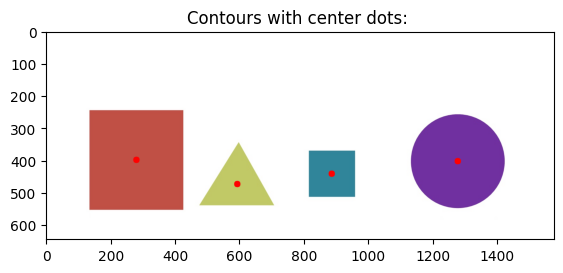

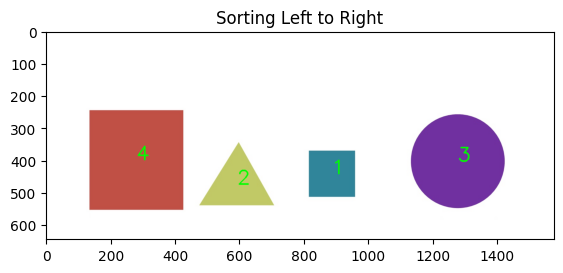

In [ ]:
image=cv2.imread('images/bunchofshapes.jpg')
original_image=image.copy()

for(i,c) in enumerate(contours):
  orig=contour_center(image,c)

showit('Contours with center dots: ',orig)

contours_L2R = sorted(contours,key=x_contour,reverse=False)

for (i,c) in enumerate(contours):
  M=cv2.moments(c)
  cx=int(M['m10']/M['m00'])
  cy=int(M['m01']/M['m00'])
  cv2.putText(original_image,str(i+1),(cx,cy),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),4)
  (x,y,w,h) = cv2.boundingRect(c)

showit('Sorting Left to Right',original_image)

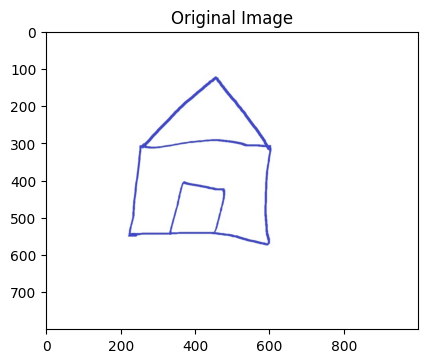

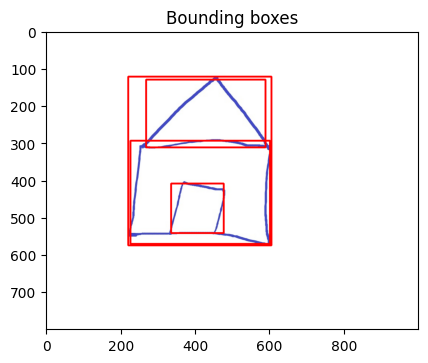

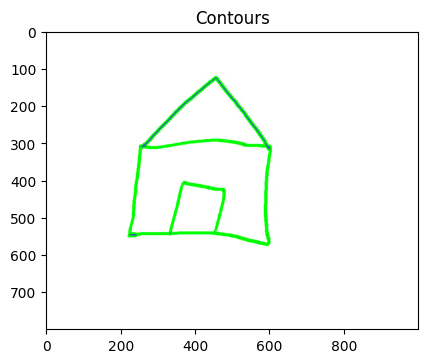

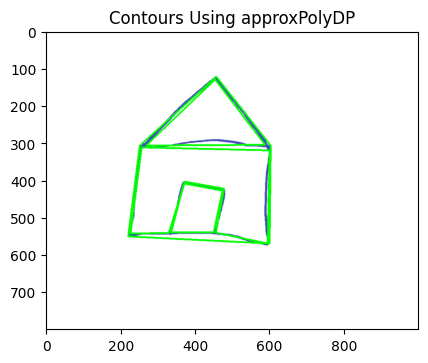

In [ ]:
image=cv2.imread('images/house.jpg')
original_image=image.copy()
showit('Original Image',original_image,size=6)
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
retr,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

contours,hierarchy=cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
copy=image.copy()

for c in contours:
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(original_image,(x,y),(x+w,y+h),(0,0,255),3)
  cv2.drawContours(image,[c],-1,(0,255,0),thickness=4)

showit('Bounding boxes',original_image,size=6)
showit("Contours",image,size=6)

for c in contours:
  accuracy=0.03*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,accuracy,True)
  cv2.drawContours(copy,[approx],-1,(0,255,0),thickness=4)

showit('Contours Using approxPolyDP',copy,size=6)

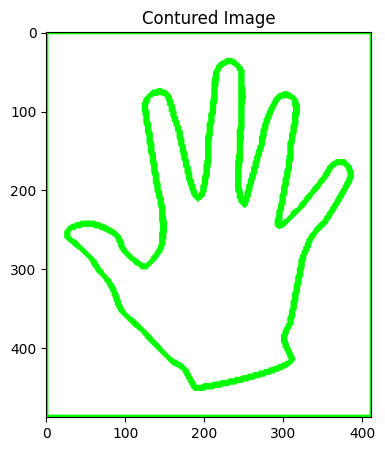

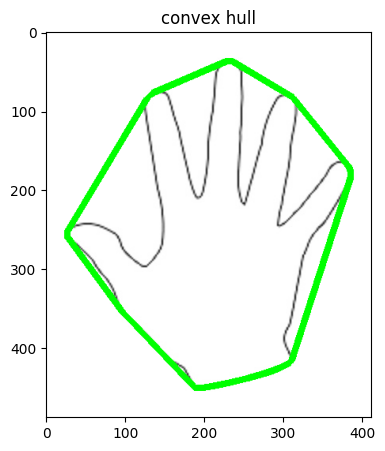

In [ ]:
image=cv2.imread('images/hand.jpg')
original_image=image.copy()
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray,176,255,0)

contours,hierarchy=cv2.findContours(thresh.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,contours,-1,(0,255,0),thickness=3)
showit('Contured Image',image,size=5)

n=len(contours)-1
contours=sorted(contours,key=cv2.contourArea,reverse=False)[:n]

for c in contours:
  hull=cv2.convexHull(c)
  cv2.drawContours(original_image,[hull],0,(0,255,0),thickness=4)

showit('convex hull',original_image,size=5)

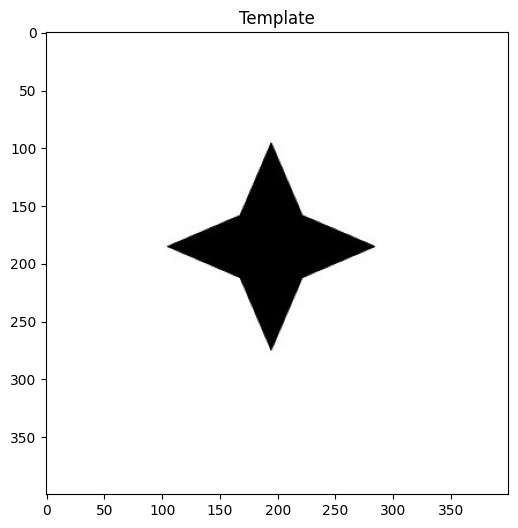

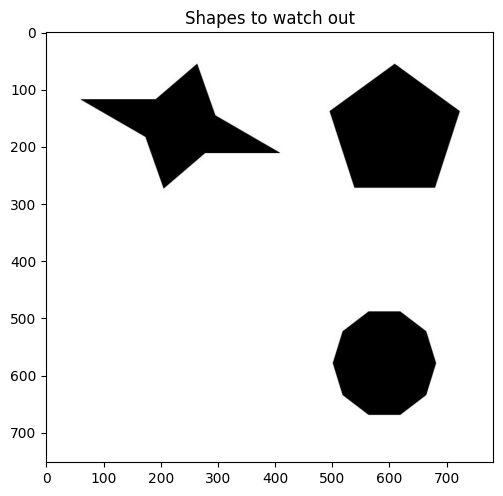

0.13081816783853514
0.15902005339788694
0.14987915682525596
0.07094034474475601


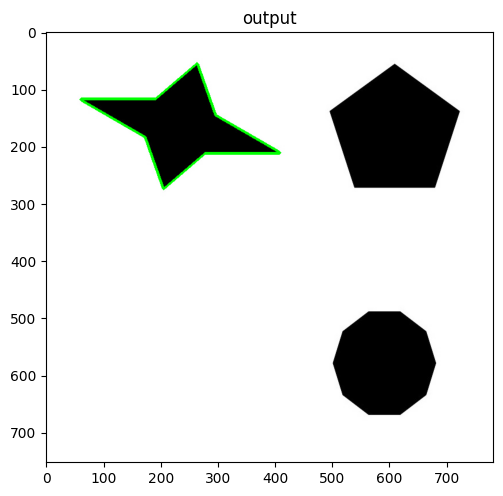

In [ ]:
template=cv2.imread('images/4star.jpg')
showit('Template',template,size=6)

target=cv2.imread('images/shapestomatch.jpg')
showit('Shapes to watch out',target,size=6)

template_gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

ret,thresh1 = cv2.threshold(template_gray,127,255,0)
ret,thresh2 = cv2.threshold(target_gray,127,255,0)

contours,hierarchy = cv2.findContours(thresh1,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours,key=cv2.contourArea,reverse=True)
template_contour = contours[1]

contours,hierarchy=cv2.findContours(thresh2,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
  match1=cv2.matchShapes(template_contour,c,3,0.0)
  print(match1)

  if match1<0.15:
    closest_contour = c
  else:
    closest_contour = []

cv2.drawContours(target,[closest_contour],-1,(0,255,0),3)
showit('output',target,size=6)